In [1]:
#python 2 and 3 comptibility
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import json
import io
import gzip
import base64
from astropy.io import fits
import matplotlib.pylab as plt
import pickle as pkl
import numpy as np
%matplotlib inline

data_path = '/home/asceta/Projects/Alerce/AlerceDHtest/datasets/ZTF'

#with open('/home/asceta/LRPpaper/datasets/ZTF/reals.pkl', 'rb') as f:
#    reals = pkl.load(f)
#with open('/home/asceta/LRPpaper/datasets/ZTF/bogus.pkl', 'rb') as f:
#    bogus = pkl.load(f)
    
#print('Number of reals: %d' %len(reals))
#print('Number of bogus: %d' %len(bogus))

In [2]:
path = data_path+'/broker_reals.json'
with open(path, "r") as f:
        dataset = json.load(f)
        


In [3]:
type(dataset)
dataset.keys()

dict_keys(['query_result'])

In [4]:
len(dataset['query_result'])

7410

In [5]:
dataset['query_result'][0].keys()

dict_keys(['_id', 'objectId', 'candid', 'candidate', 'prv_candidates', 'cutoutScience', 'cutoutTemplate', 'cutoutDifference'])

In [6]:
dataset['query_result'][0]['candidate'].keys()

dict_keys(['jd', 'fid', 'pid', 'diffmaglim', 'pdiffimfilename', 'programpi', 'programid', 'candid', 'isdiffpos', 'tblid', 'nid', 'rcid', 'field', 'xpos', 'ypos', 'ra', 'dec', 'magpsf', 'sigmapsf', 'chipsf', 'magap', 'sigmagap', 'distnr', 'magnr', 'sigmagnr', 'chinr', 'sharpnr', 'sky', 'magdiff', 'fwhm', 'classtar', 'mindtoedge', 'magfromlim', 'seeratio', 'aimage', 'bimage', 'aimagerat', 'bimagerat', 'elong', 'nneg', 'nbad', 'rb', 'ssdistnr', 'ssmagnr', 'ssnamenr', 'sumrat', 'magapbig', 'sigmagapbig', 'ranr', 'decnr', 'sgmag1', 'srmag1', 'simag1', 'szmag1', 'sgscore1', 'distpsnr1', 'ndethist', 'ncovhist', 'jdstarthist', 'jdendhist', 'scorr', 'tooflag', 'objectidps1', 'objectidps2', 'sgmag2', 'srmag2', 'simag2', 'szmag2', 'sgscore2', 'distpsnr2', 'objectidps3', 'sgmag3', 'srmag3', 'simag3', 'szmag3', 'sgscore3', 'distpsnr3', 'nmtchps', 'rfid', 'jdstartref', 'jdendref', 'nframesref'])

In [7]:
dataset['query_result'][0]

{'_id': '460140646015010002_ZTF17aaaiikr',
 'objectId': 'ZTF17aaaiikr',
 'candid': 460140646015010002,
 'candidate': {'jd': 2458214.6406481,
  'fid': 2,
  'pid': 460140646015,
  'diffmaglim': 18.096073150634766,
  'pdiffimfilename': 'ztf_20180406140625_000565_zr_c16_o_q1_scimrefdiffimg.fits',
  'programpi': 'Kulkarni',
  'programid': 1,
  'candid': 460140646015010002,
  'isdiffpos': 'f',
  'tblid': 2,
  'nid': 460,
  'rcid': 60,
  'field': 565,
  'xpos': 1900.0875244140625,
  'ypos': 2474.431640625,
  'ra': 107.1357327,
  'dec': 21.977911,
  'magpsf': 17.494844436645508,
  'sigmapsf': 0.07626913487911224,
  'chipsf': 2.7487144470214844,
  'magap': 17.451900482177734,
  'sigmagap': 0.11599999666213989,
  'distnr': 0.07062359154224396,
  'magnr': 16.04400062561035,
  'sigmagnr': 0.017000000923871994,
  'chinr': 1.128999948501587,
  'sharpnr': -0.0560000017285347,
  'sky': -11.423020362854004,
  'magdiff': -0.04294378682971001,
  'fwhm': 2.3499999046325684,
  'classtar': 0.996999979019165

In [8]:
all_sky = []
for alert in dataset["query_result"]:
    try:
        sky = alert["candidate"]["nframesref"]
        all_sky.append(sky)
    except:
        print('no param')
        pass
all_sky = np.array(all_sky)

no param
no param
no param
no param
no param
no param
no param
no param
no param
no param
no param
no param
no param
no param
no param
no param
no param
no param
no param
no param
no param
no param
no param
no param
no param
no param
no param
no param
no param
no param
no param


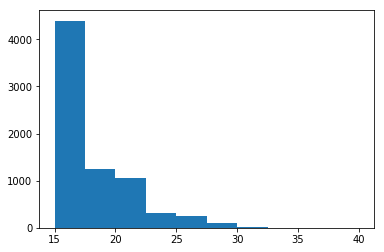

In [9]:
plt.hist(all_sky)#, bins=np.arange(-7.5,7.5,0.1))
plt.show()

In [10]:
all_fields = []
for alert in dataset["query_result"]:
    field = alert["candidate"]["field"]
    all_fields.append(field)
all_fields = np.unique(all_fields)

camera_obs_cond = {}
camera_obs_cond["obs_conditions"] = {}
for i in range(all_fields.shape[0]):
    camera_obs_cond["obs_conditions"]["Field%i" % all_fields[i]]={'n_alerts':0, 'alerts_conditions':[]}

In [11]:
camera_obs_cond["obs_conditions"].keys()

dict_keys(['Field473', 'Field479', 'Field482', 'Field513', 'Field515', 'Field516', 'Field517', 'Field518', 'Field519', 'Field520', 'Field521', 'Field522', 'Field523', 'Field524', 'Field525', 'Field526', 'Field531', 'Field532', 'Field539', 'Field563', 'Field565', 'Field566', 'Field567', 'Field568', 'Field569', 'Field570', 'Field571', 'Field572', 'Field573', 'Field574', 'Field575', 'Field576', 'Field577', 'Field578', 'Field579', 'Field580', 'Field581', 'Field582', 'Field583', 'Field587', 'Field590', 'Field591', 'Field615', 'Field616', 'Field617', 'Field618', 'Field619', 'Field620', 'Field621', 'Field622', 'Field623', 'Field624', 'Field625', 'Field626', 'Field627', 'Field628', 'Field629', 'Field630', 'Field631', 'Field632', 'Field633', 'Field634', 'Field635', 'Field639', 'Field640', 'Field663', 'Field664', 'Field666', 'Field667', 'Field668', 'Field669', 'Field670', 'Field671', 'Field672', 'Field673', 'Field674', 'Field675', 'Field676', 'Field677', 'Field678', 'Field679', 'Field680', 'Fiel

In [12]:
len(list(camera_obs_cond["obs_conditions"].keys()))

158

In [13]:
#obs_dict = {'airmass':None, 'epoch': None, 'exp_time': None, 'filter': None, 'limmag3': None, 
#            'limmag5': None, 'obs_days': None, 'seeing': None, 
#            'sky_brightness': None, 'zero_point': None}

passbands = ["g", "r", "i"]

i=0
for alert in dataset["query_result"]:
    obs_dict = {'airmass':None, 'epoch': None, 'exp_time': None, 'filter': None, 'limmag3': None, 
            'limmag5': None, 'obs_days': None, 'seeing': None, 
            'sky_brightness': None, 'zero_point': None}
    
    field = alert["candidate"]["field"]
    
    obs_dict['airmass'] = None
    try:
        obs_dict['epoch'] = alert["candidate"]["nframesref"]
    except:
        obs_dict['epoch'] = 1
    obs_dict['exp_time'] = 30#alert["candidate"]["exptime"]
    obs_dict['filter'] = passbands[alert["candidate"]["fid"]-1]
    obs_dict['limmag3'] = None
    obs_dict['limmag5'] = alert["candidate"]["diffmaglim"]
    obs_dict['obs_days'] = alert["candidate"]["jd"]
    obs_dict['seeing'] = alert["candidate"]["fwhm"]
    obs_dict['sky_brightness'] = None #Needs to be calculated from science stamp
    obs_dict['zero_point'] =  1.0 #We dont have it but a constant is enough
    
    
    camera_obs_cond["obs_conditions"]["Field%i" % field]['n_alerts']+=1
    camera_obs_cond["obs_conditions"]["Field%i" % field]['alerts_conditions'].append(obs_dict)
    i+=1
    print(obs_dict['obs_days'])
    

2458214.6406481
2458217.6592708
2458217.6763773
2458227.6484722
2458249.6546412
2458214.6917824
2458214.7452546
2458217.7367014
2458217.8076968
2458224.760081
2458258.6852894
2458270.6746528
2458274.699375
2458274.7222569
2458216.7964583
2458221.7280208
2458224.7637731
2458227.7504167
2458242.7924769
2458245.6686458
2458248.7339352
2458255.7374074
2458221.7280208
2458224.7637731
2458224.7827546
2458227.7504167
2458242.7924769
2458245.6686458
2458248.7339352
2458255.7374074
2458216.7197917
2458218.6775
2458219.6997801
2458231.6432986
2458233.6633218
2458223.6856134
2458227.656713
2458245.658669
2458217.6588079
2458217.6583449
2458227.6601042
2458218.6847222
2458224.6852083
2458229.682963
2458242.6514352
2458245.685162
2458217.7185185
2458224.6789931
2458245.6531944
2458217.8009375
2458217.8496181
2458245.7909259
2458211.8396644
2458214.7850347
2458221.7615856
2458227.7891435
2458227.8112847
2458230.7550463
2458230.8412153
2458236.7355208
2458236.8745023
2458242.744213
2458248.7173611
24

2458217.7006713
2458217.7189699
2458221.7053241
2458224.679456
2458224.6913773
2458227.7468056
2458231.6699653
2458248.6623727
2458217.7002083
2458217.7185185
2458245.6531944
2458217.7002083
2458217.7185185
2458221.7029514
2458224.6789931
2458245.6531944
2458257.7285301
2458217.7021644
2458224.6804051
2458229.6895833
2458245.6522569
2458248.6610069
2458217.7030787
2458217.7569213
2458224.6818171
2458224.6822801
2458227.7462963
2458227.7472685
2458231.6685185
2458245.6541088
2458248.6619097
2458254.6873611
2458257.7276157
2458217.7030787
2458221.7256481
2458221.7379745
2458224.6818171
2458231.6685185
2458217.7021644
2458217.7175926
2458224.6804051
2458229.6895833
2458245.6522569
2458248.6610069
2458257.729456
2458217.7021644
2458217.7175926
2458224.6804051
2458229.6895833
2458217.7035532
2458217.7569213
2458217.7578472
2458224.6918403
2458227.7462963
2458227.7472685
2458254.6873611
2458257.7276157
2458272.6668403
2458217.7054514
2458217.7546181
2458221.7365394
2458217.7035532
2458217.75

2458272.947338
2458244.9355671
2458247.8603935
2458247.9160301
2458252.9201968
2458255.898588
2458258.8577778
2458266.8344676
2458272.8324653
2458275.8571759
2458237.8887384
2458237.9736227
2458244.8677199
2458244.9264468
2458247.8718403
2458252.9056019
2458252.9361343
2458255.9509375
2458258.8442361
2458266.9335995
2458269.8252431
2458269.9066551
2458272.9106944
2458272.9710301
2458275.9143171
2458242.8884259
2458242.8716667
2458245.8306481
2458248.8656597
2458254.870463
2458254.912037
2458257.8038542
2458257.8686343
2458261.8069329
2458266.7860417
2458269.8673264
2458272.7445602
2458272.8191088
2458275.8660995
2458244.9264468
2458247.8718403
2458252.9056019
2458252.9361343
2458255.9103125
2458255.9509375
2458258.8442361
2458258.9303588
2458261.8443981
2458261.9537384
2458242.6514352
2458245.685162
2458248.6804282
2458257.7215972
2458260.6749074
2458248.7598148
2458257.7210532
2458242.7187963
2458248.7224306
2458248.7573611
2458254.7034375
2458257.7669097
2458257.7787963
2458260.70456

In [14]:
fld=list(camera_obs_cond["obs_conditions"].keys())[2]
camera_obs_cond["obs_conditions"][fld]['alerts_conditions']

[{'airmass': None,
  'epoch': 15,
  'exp_time': 30,
  'filter': 'r',
  'limmag3': None,
  'limmag5': 20.321096420288086,
  'obs_days': 2458258.8945718,
  'seeing': 3.990000009536743,
  'sky_brightness': None,
  'zero_point': 1.0},
 {'airmass': None,
  'epoch': 15,
  'exp_time': 30,
  'filter': 'r',
  'limmag3': None,
  'limmag5': 19.90186309814453,
  'obs_days': 2458261.8134375,
  'seeing': 4.269999980926514,
  'sky_brightness': None,
  'zero_point': 1.0},
 {'airmass': None,
  'epoch': 15,
  'exp_time': 30,
  'filter': 'r',
  'limmag3': None,
  'limmag5': 20.410295486450195,
  'obs_days': 2458273.854537,
  'seeing': 1.899999976158142,
  'sky_brightness': None,
  'zero_point': 1.0},
 {'airmass': None,
  'epoch': 15,
  'exp_time': 30,
  'filter': 'r',
  'limmag3': None,
  'limmag5': 20.654415130615234,
  'obs_days': 2458276.7931481,
  'seeing': 2.140000104904175,
  'sky_brightness': None,
  'zero_point': 1.0}]

In [15]:
camera_obs_cond["obs_conditions"][fld]['n_alerts']

4

In [16]:
count = 0
for field in list(camera_obs_cond["obs_conditions"].keys()):
    count+= camera_obs_cond["obs_conditions"][field]['n_alerts']
count

7410

In [17]:
# get epochs
import operator
import copy

fields_dict = copy.deepcopy(camera_obs_cond["obs_conditions"])

#sort mjd
for field in fields_dict:
    fields_dict[field]['alerts_conditions'] = sorted(fields_dict[field]['alerts_conditions'], key=lambda k: k['obs_days'])
#assign epoch
for field in fields_dict:
    mjds = []
    for i, dictionary in enumerate(fields_dict[field]['alerts_conditions']):
        mjds.append(dictionary['obs_days'])
    mjds = np.unique(mjds)
    for i, dictionary in enumerate(fields_dict[field]['alerts_conditions']):
        dictionary['epoch'] = (np.argwhere(mjds==dictionary['obs_days'])[0][0])+1

In [18]:
#compare lists order
"""
fld=list(camera_obs_cond["obs_conditions"].keys())[24]
for dict in camera_obs_cond["obs_conditions"][fld]['alerts_conditions']:
    print(dict['obs_days'])
print("\n")
for dict in field_dict[fld]['alerts_conditions']:
    print(dict['obs_days'])
for dict in field_dict[fld]['alerts_conditions']:
    print(dict)
"""


'\nfld=list(camera_obs_cond["obs_conditions"].keys())[24]\nfor dict in camera_obs_cond["obs_conditions"][fld][\'alerts_conditions\']:\n    print(dict[\'obs_days\'])\nprint("\n")\nfor dict in field_dict[fld][\'alerts_conditions\']:\n    print(dict[\'obs_days\'])\nfor dict in field_dict[fld][\'alerts_conditions\']:\n    print(dict)\n'

In [19]:
#field_dict[field]['alerts_conditions']

In [20]:
#generate *.dat files
#from utils.print_manager import print_manager
import sys
import os
PATH_TO_PROJECT = os.path.abspath(
    os.path.join(os.path.dirname('__file__'), ''))
sys.path.append((PATH_TO_PROJECT))



#hola = print
data_path = os.path.join(PATH_TO_PROJECT, 'datFiles')
for field in fields_dict:
    print(field)
    p#rint_manager_obj = print_manager()
    file = open(os.path.join(data_path, '%s.dat'%field, "w") 
    #print = print_manager_obj.config(data_path, '%s.dat'%field, verbose=False)
    file.write('MJD FILTER EXPTIME EPOCH\n')
    for alert_dict in fields_dict[field]['alerts_conditions']:
        file.write('%s %s %s %s\n' %(str(alert_dict['obs_days']),
                              str(alert_dict['filter']), str(float(alert_dict['exp_time'])), str(float(alert_dict['epoch']))))
    file.close()
    #print = print_manager_obj.dont_print_in_file()
    #del print_manager_obj

SyntaxError: invalid syntax (<ipython-input-20-4bd52b6a48ef>, line 18)

In [ ]:
data_path

In [ ]:
data_path = os.path.join(PATH_TO_PROJECT, 'datFiles')

In [ ]:
print('hola')